In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from forecast_combine.reconcile import ForecastReconciler

Importing plotly failed. Interactive plots will not work.


In [2]:
# trained models for each autonomous factor
output_folder = '../model_output/'
model_names = ['CIC', 'NFA', 'SAB', 'Total_AF']
forecasters_d = {}
for model_name in model_names:
    with open(output_folder + model_name + '_forecast.pkl', 'rb') as f:
        forecasters_d[model_name] = pickle.load(f)    

# Hierarchical relationship matrix
S = pd.DataFrame(np.array([[1,1,-1], [1,0,0], [0,1,0], [0,0,1]]), 
                 columns=['CIC', 'SAB', 'NFA'], 
                 index=['Total_AF', 'CIC', 'SAB', 'NFA'])

# Hiearchical reconciliation model
reconciler = ForecastReconciler(forecasters_d=forecasters_d, S = S)

In [3]:
NFA_X = pd.read_csv('NFA_X.csv')
NFA_X['date'] = pd.to_datetime(NFA_X['Unnamed: 0'])
NFA_X = NFA_X.set_index('date').drop('Unnamed: 0', axis=1)

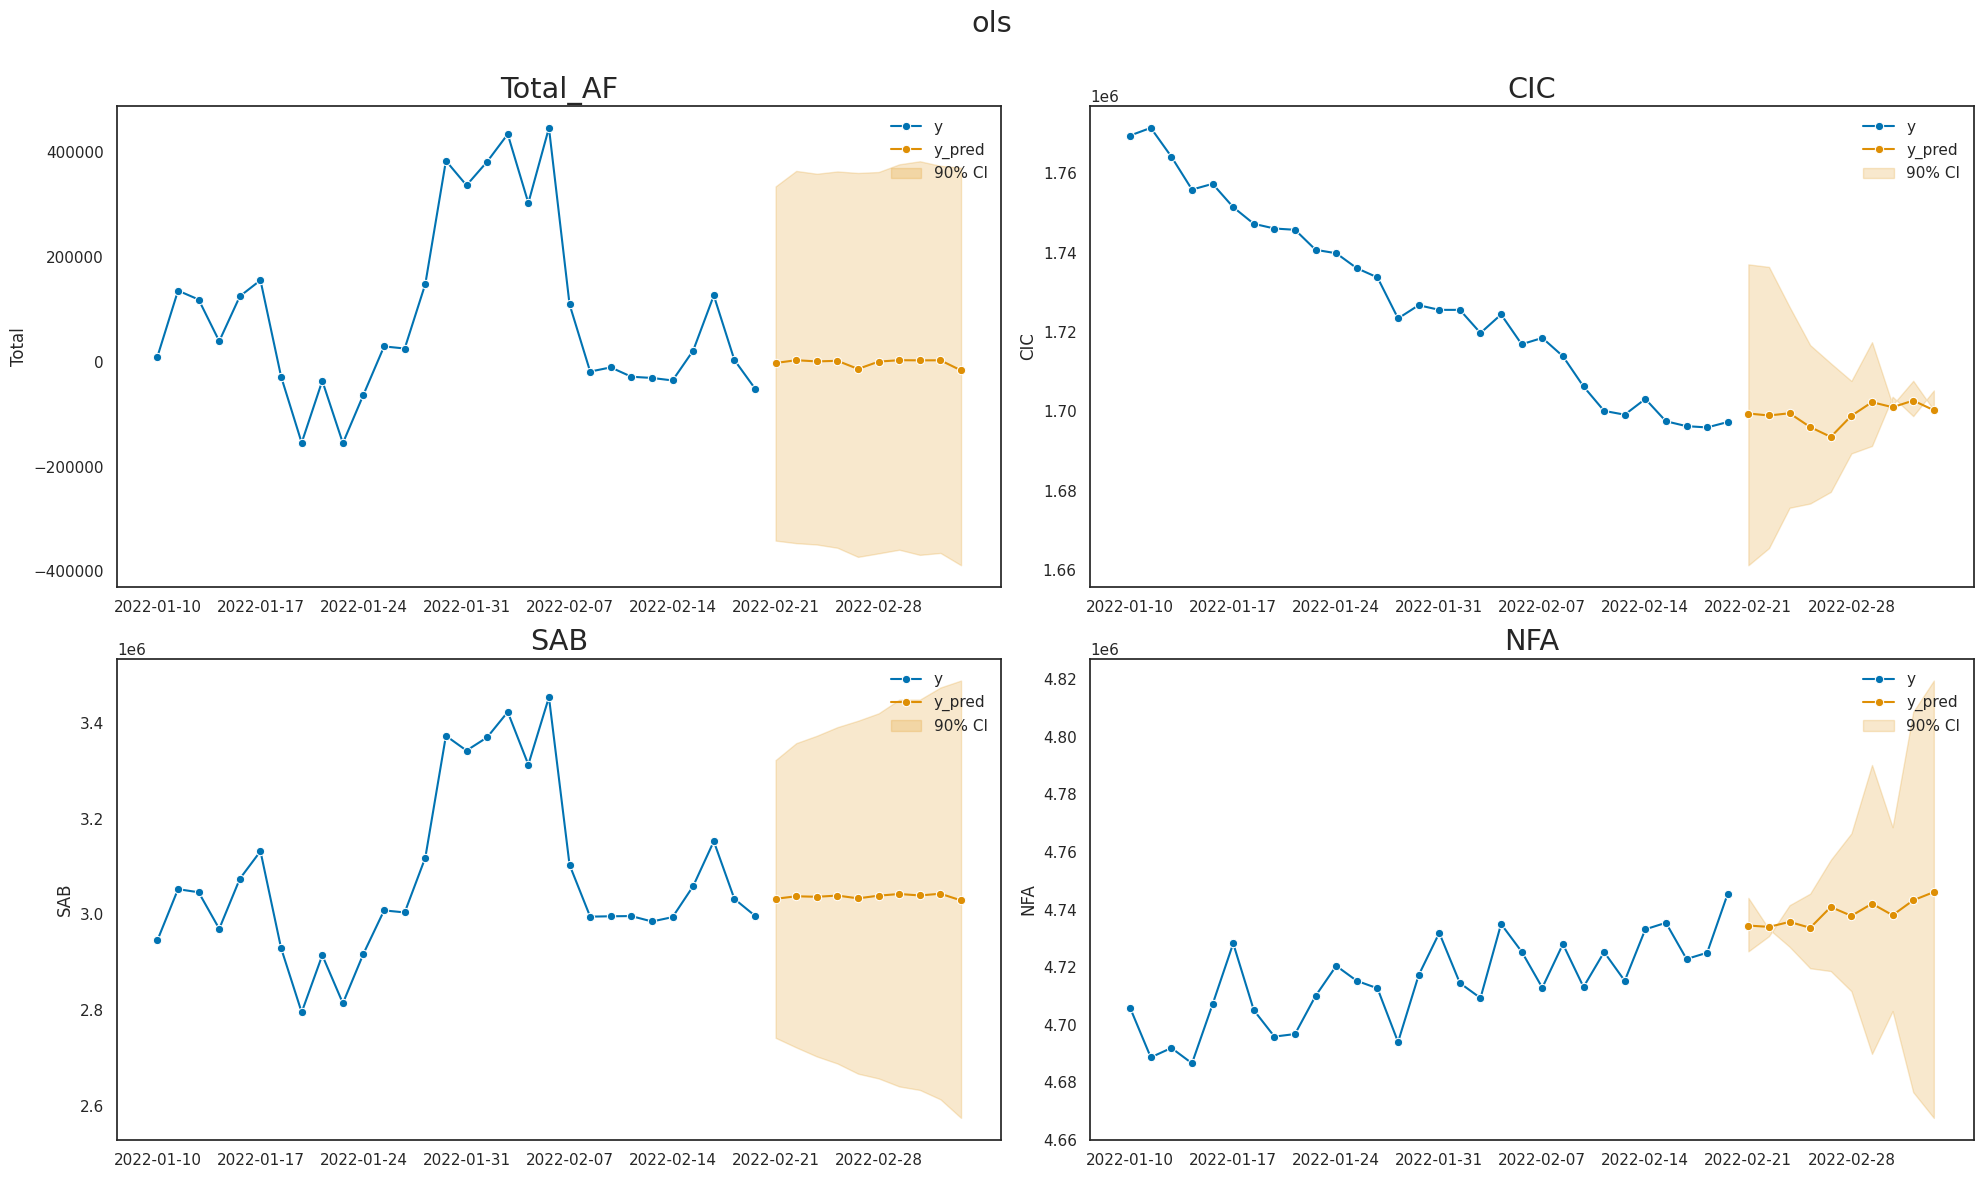

wls reconciliation method requires the forecasters prediction errors variance-covariance matrix ...


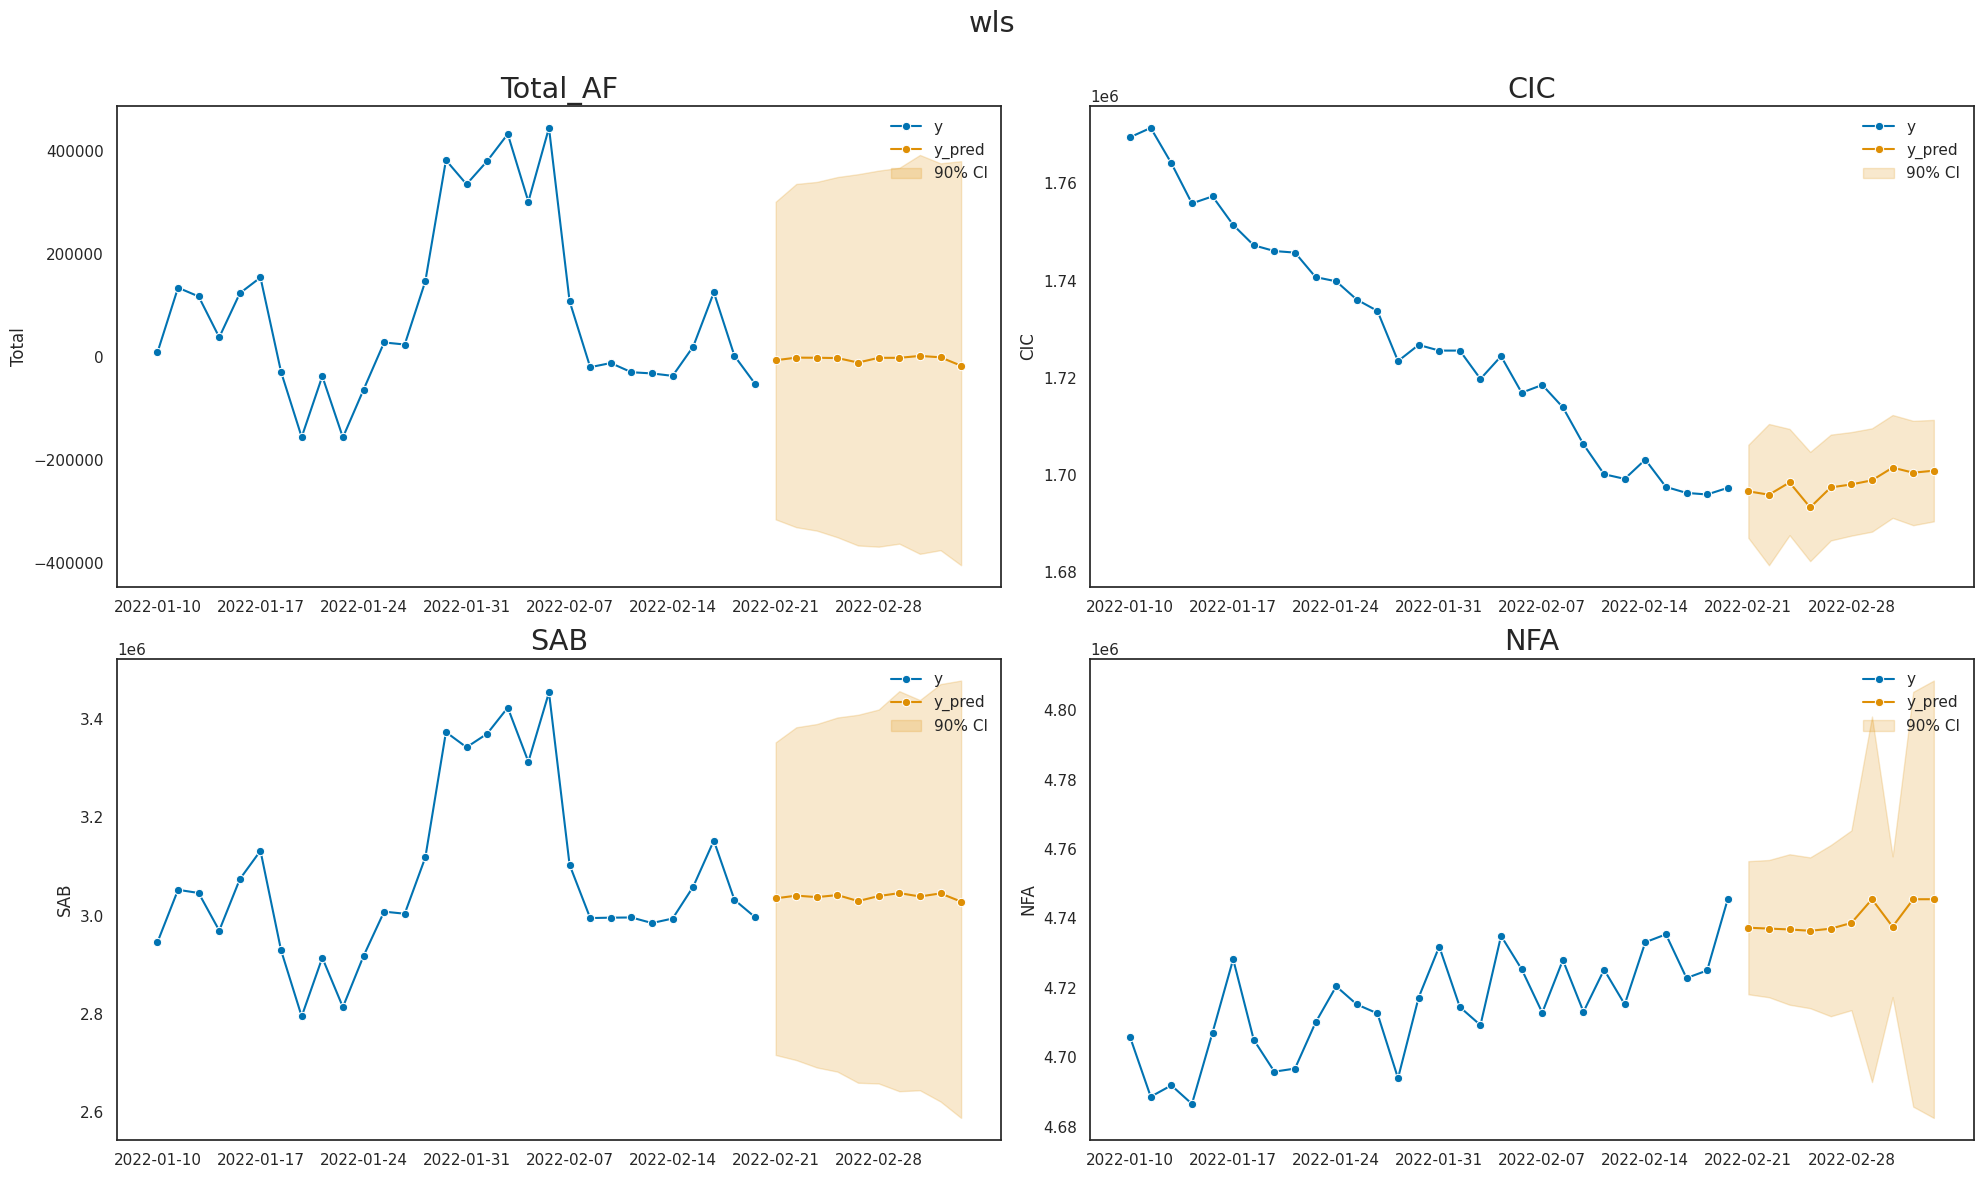

mint reconciliation method requires the forecasters prediction errors variance-covariance matrix ...


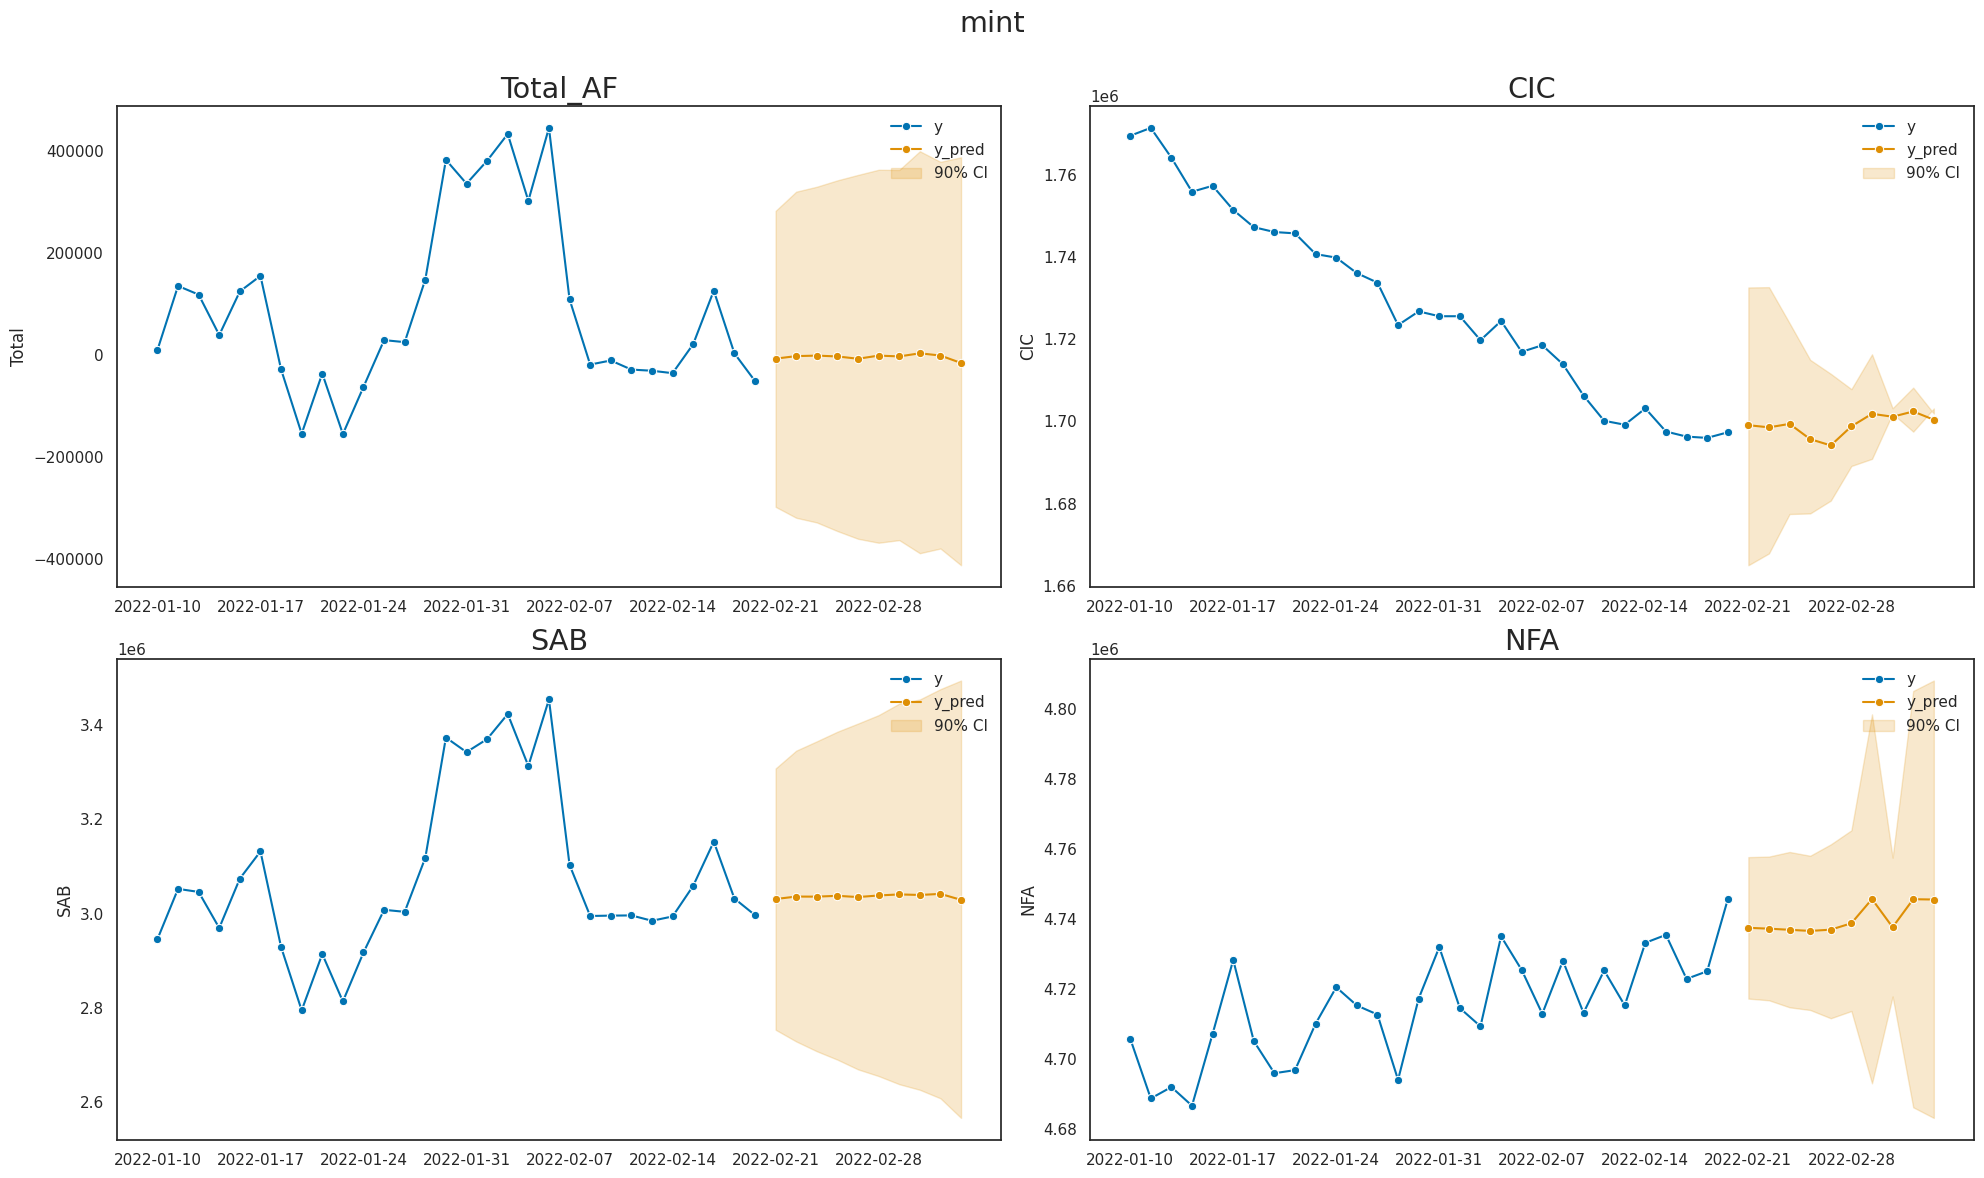

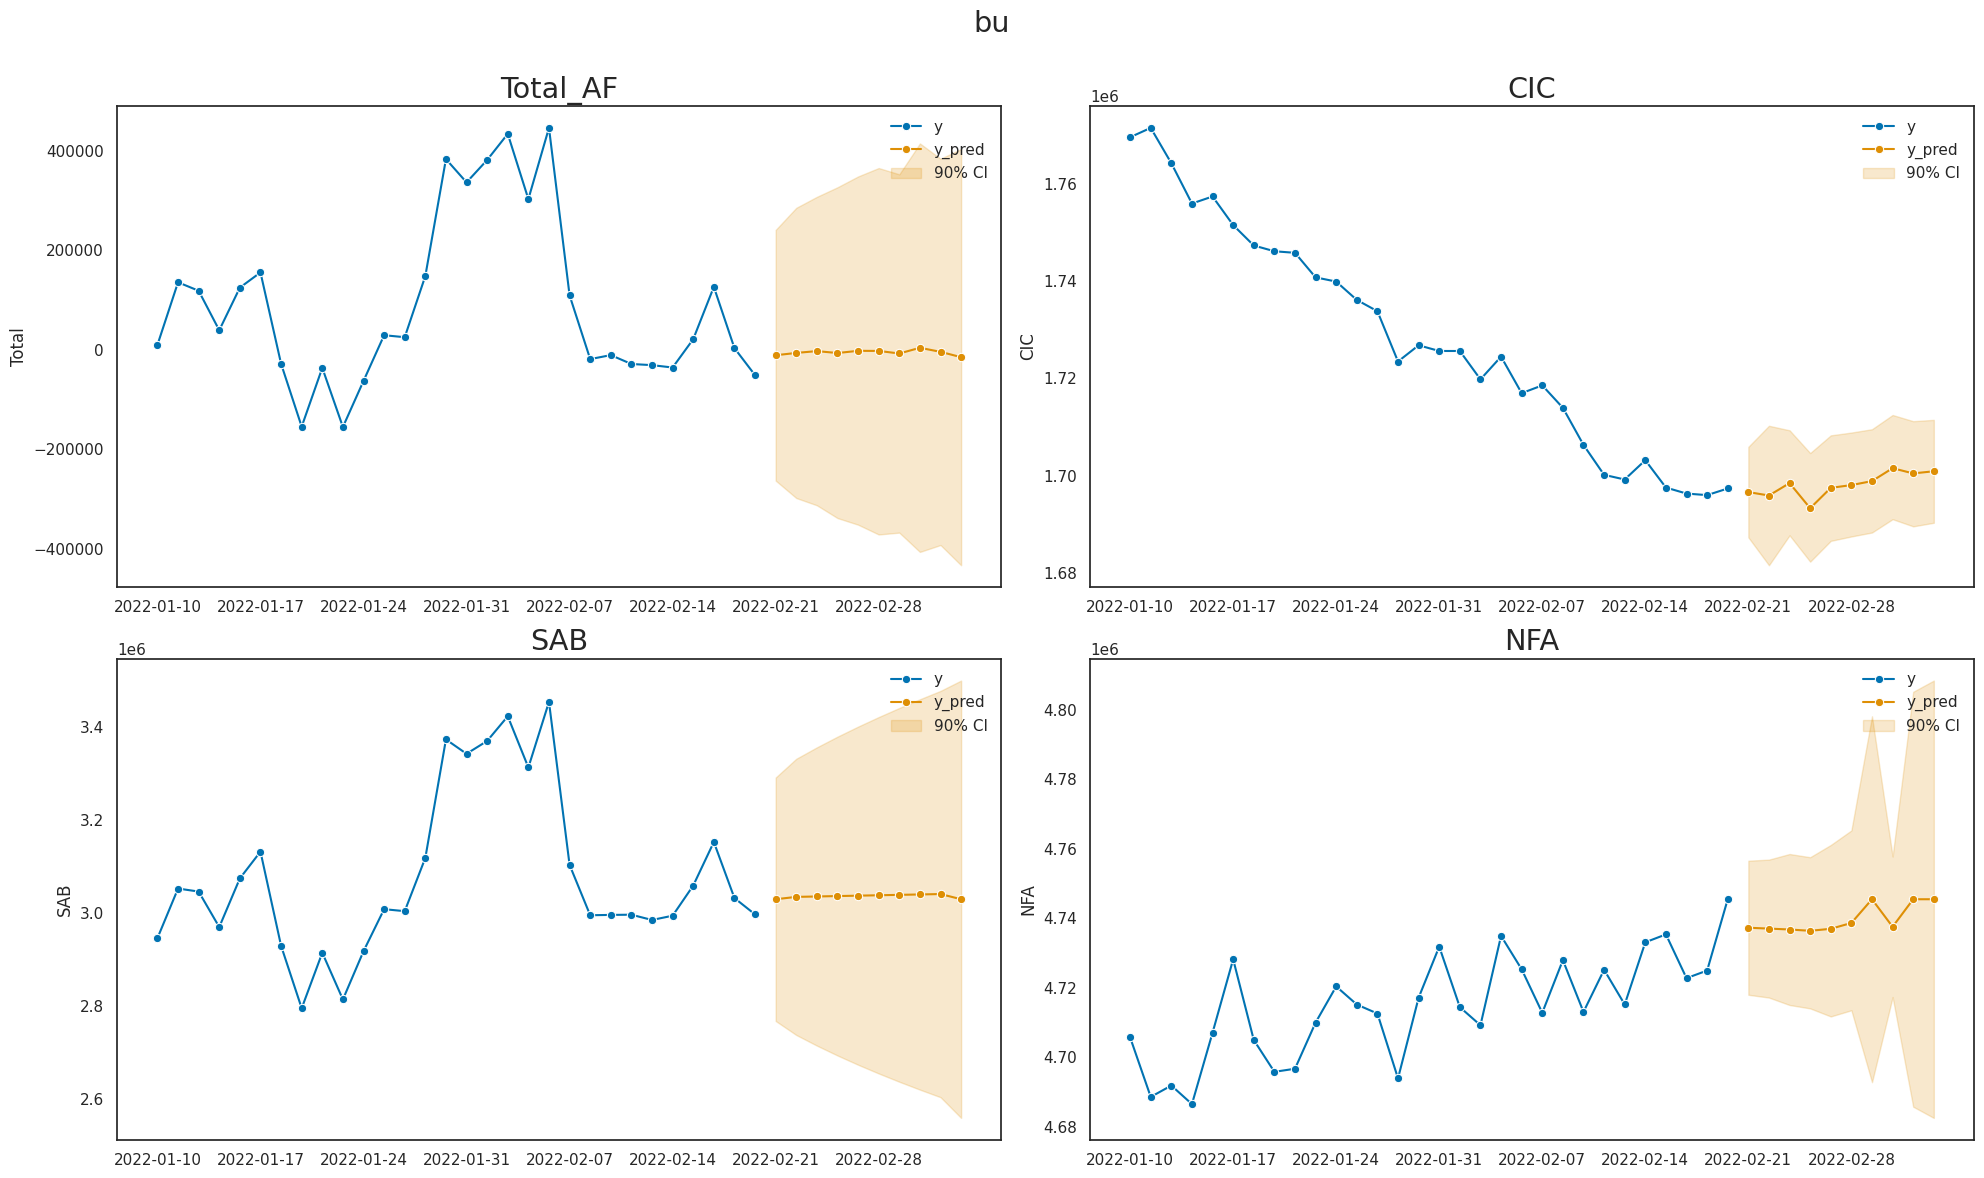

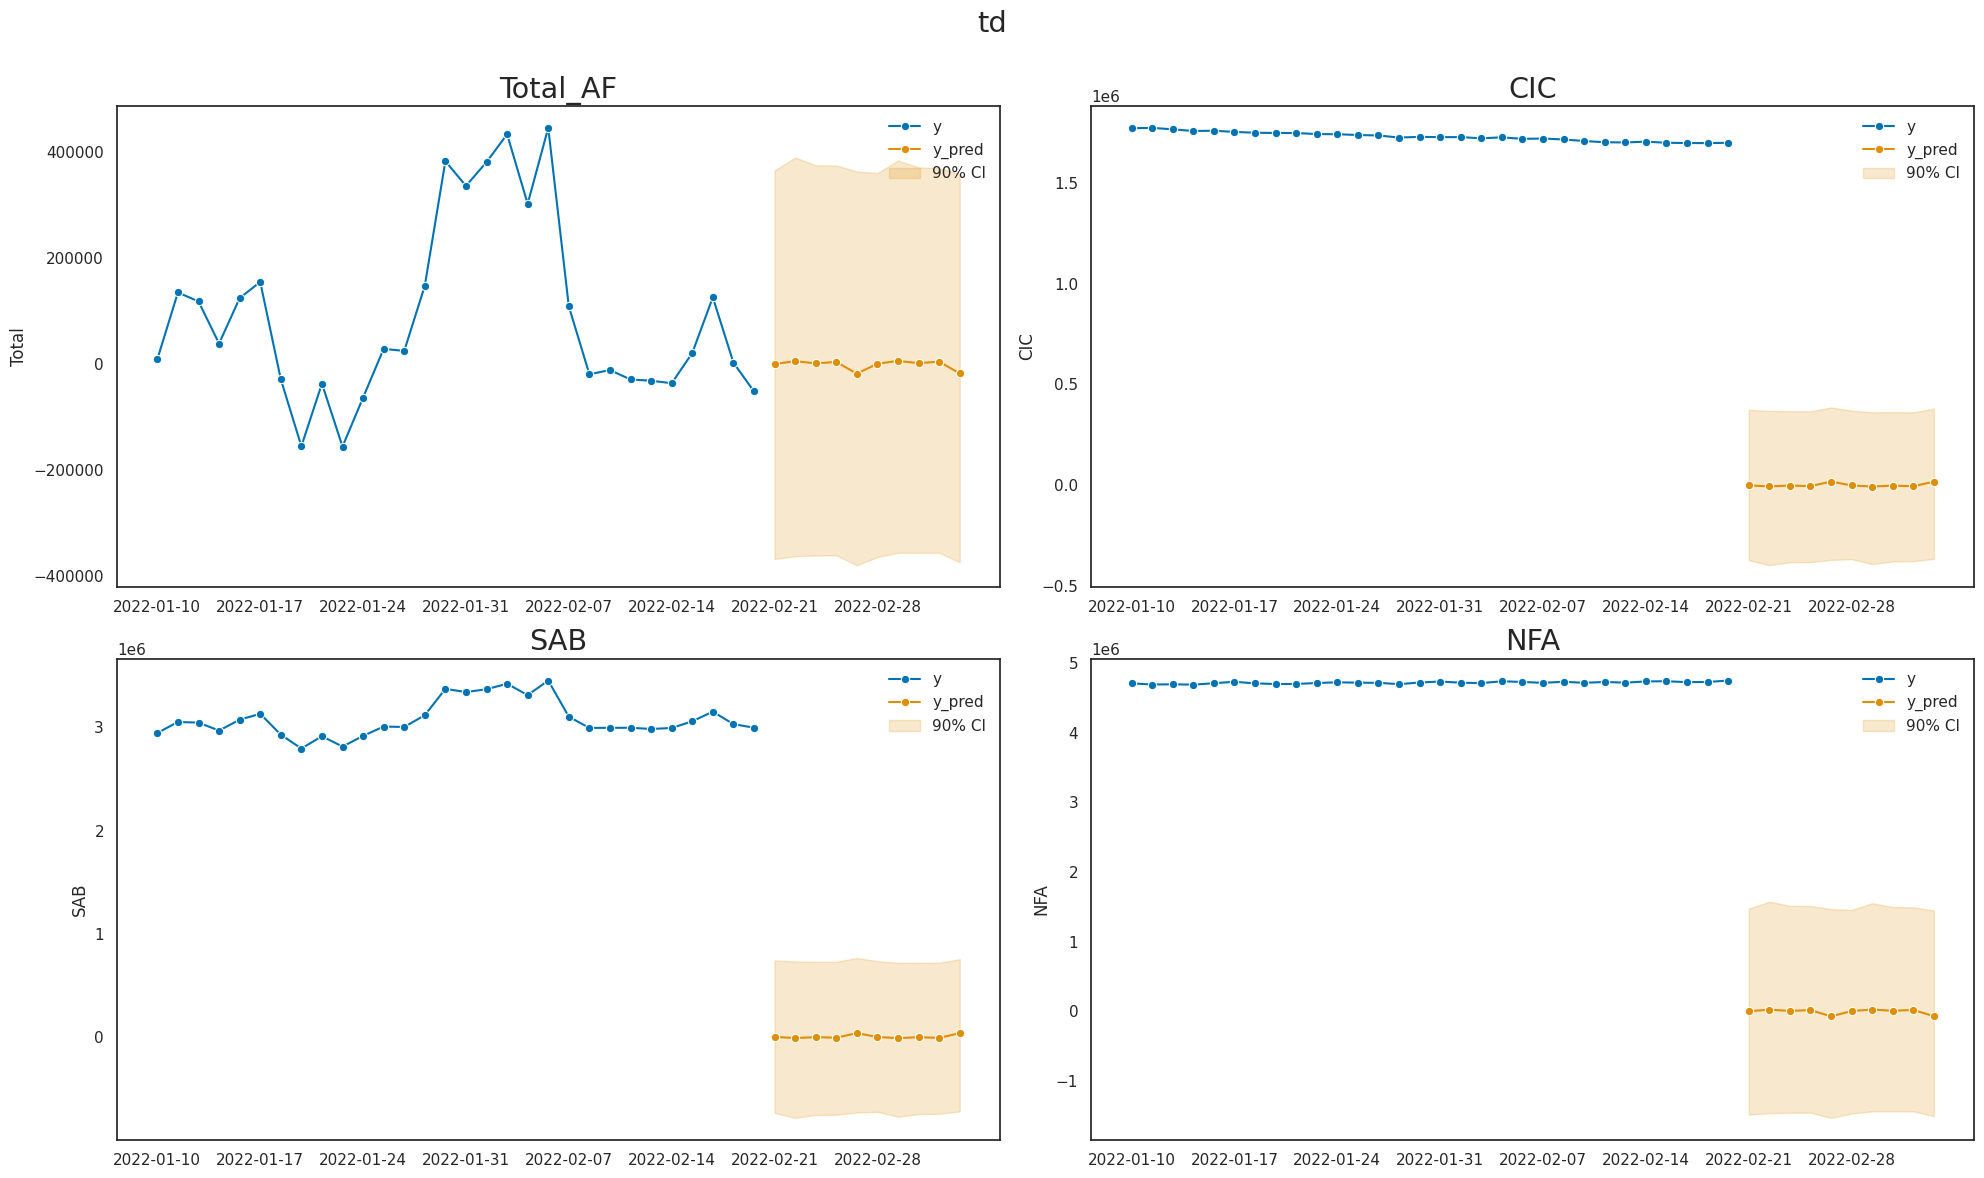

In [4]:
for m in ['ols', 'wls', 'mint', 'bu', 'td']:
    reconciled_preds, reconciled_intervals = reconciler.predict(X = {'NFA': NFA_X}, reconciliation_method = m)
    reconciler.plot_predict(reconciled_preds, reconciled_intervals, title = m)
    plt.show()